In [9]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)


# open the file in which want to do the t-sne plot

In [31]:
df = pd.read_csv('file.txt', sep = "\t", low_memory=False)

# Set the column name to be used as index

In [32]:
df = df.set_index('tracking_id')
df

,Cct3,Ddt,Sdf2,Rhoc,Ndufa11,Clpp,Mea1,Atp5d,Rps11,Gstm5,...,Qk,TCONS_00002950,TCONS_00019209,TCONS_00020312,TCONS_00053076,TCONS_00056852,TCONS_00146999,TCONS_00151380,TCONS_00215219,TCONS_00233528
tracking_id,,,,,,,,,,,,,,,,,,,,,
q1_0,36.164100,10.969000,0.000000,9.79551,78.834900,131.60000,0.00000,71.657300,393.659000,1.91786,...,95.34800,0.000,0.0000,51.363700,15.83890,15.83810,0.0000,22.8390,0.0,0.0
q2_0,10.652500,162.866000,4.402710,78.79980,221.054000,0.00000,0.00000,96.682700,179.392000,124.77000,...,0.00000,0.000,0.0000,1.571910,34.54950,13.95780,0.0000,59.4914,0.0,0.0
q3_0,0.000000,0.000000,11.902100,0.00000,0.001996,0.00000,0.00000,0.000345,0.000000,0.00000,...,32.22880,332.879,0.0000,0.000000,0.00000,0.00000,0.0000,965.6110,0.0,0.0
q4_0,0.000485,38.974300,0.000000,1.21324,123.622000,44.42270,5.29563,256.403000,151.939000,20.55250,...,21.64730,0.000,14.3681,13.498200,7.57303,0.00000,0.0000,0.0000,0.0,0.0
q5_0,0.000000,47.323300,21.160900,0.00000,0.000000,0.00000,0.00000,0.000000,1245.800000,0.00000,...,0.00000,702.954,0.0000,1564.620000,0.00000,0.00000,0.0000,2462.9500,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q66_0,0.000000,0.000000,0.000000,0.00000,0.001774,0.00000,0.00000,0.000317,0.001566,0.00000,...,5.98975,304.197,0.0000,42.674300,0.00000,0.00000,0.0000,0.0000,0.0,0.0
q67_0,19.183500,5.000720,16.373000,11.00400,129.608000,4.63855,3.67440,106.050000,266.237000,13.09350,...,75.05850,0.000,0.0000,0.990876,26.00880,20.85390,0.0000,30.0266,0.0,0.0
q68_0,0.000000,0.001063,0.000000,0.00000,0.000000,2.90188,0.00000,6.183060,13.367700,0.00000,...,0.00000,0.000,0.0000,1.813180,0.00000,0.00000,0.0000,100.6180,0.0,0.0


# Put the clusters/classes for each cell (e.g. for each line)

In [33]:
classe = ["2", "2", "1", "2", "1", "2", "1", "2", "2", "1", "2", "2", "2", "2", "1", "1", "1", "1", "1", "2", "1", "1", "1", "2", "1", "1", "1", "1", "2", "2", "2", "1", "2", "1", "2", "2", "2", "2", "2", "1", "1", "2", "2", "2", "1", "2", "2", "1", "1", "1", "1", "2", "1", "1", "1", "2", "2", "1", "2", "1", "2", "2", "2", "1", "2", "1", "2", "1", "2", "2"]

In [34]:
df['classe'] = classe
df_test = df.reset_index(drop=True)
df_test

,Cct3,Ddt,Sdf2,Rhoc,Ndufa11,Clpp,Mea1,Atp5d,Rps11,Gstm5,...,TCONS_00002950,TCONS_00019209,TCONS_00020312,TCONS_00053076,TCONS_00056852,TCONS_00146999,TCONS_00151380,TCONS_00215219,TCONS_00233528,classe
0,36.164100,10.969000,0.000000,9.79551,78.834900,131.60000,0.00000,71.657300,393.659000,1.91786,...,0.000,0.0000,51.363700,15.83890,15.83810,0.0000,22.8390,0.0,0.0,2
1,10.652500,162.866000,4.402710,78.79980,221.054000,0.00000,0.00000,96.682700,179.392000,124.77000,...,0.000,0.0000,1.571910,34.54950,13.95780,0.0000,59.4914,0.0,0.0,2
2,0.000000,0.000000,11.902100,0.00000,0.001996,0.00000,0.00000,0.000345,0.000000,0.00000,...,332.879,0.0000,0.000000,0.00000,0.00000,0.0000,965.6110,0.0,0.0,1
3,0.000485,38.974300,0.000000,1.21324,123.622000,44.42270,5.29563,256.403000,151.939000,20.55250,...,0.000,14.3681,13.498200,7.57303,0.00000,0.0000,0.0000,0.0,0.0,2
4,0.000000,47.323300,21.160900,0.00000,0.000000,0.00000,0.00000,0.000000,1245.800000,0.00000,...,702.954,0.0000,1564.620000,0.00000,0.00000,0.0000,2462.9500,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.000000,0.000000,0.000000,0.00000,0.001774,0.00000,0.00000,0.000317,0.001566,0.00000,...,304.197,0.0000,42.674300,0.00000,0.00000,0.0000,0.0000,0.0,0.0,1
66,19.183500,5.000720,16.373000,11.00400,129.608000,4.63855,3.67440,106.050000,266.237000,13.09350,...,0.000,0.0000,0.990876,26.00880,20.85390,0.0000,30.0266,0.0,0.0,2
67,0.000000,0.001063,0.000000,0.00000,0.000000,2.90188,0.00000,6.183060,13.367700,0.00000,...,0.000,0.0000,1.813180,0.00000,0.00000,0.0000,100.6180,0.0,0.0,1
68,20.759100,27.738000,0.421965,1.72522,202.663000,16.63900,16.45840,66.728200,262.639000,22.09750,...,0.000,0.0000,13.374300,8.25964,7.01891,0.0000,121.6320,0.0,0.0,2


# Prepare the data to PCA and t-SNE

In [35]:
lista = []
for col in df_test.columns: 
    lista.append(col)

lista.remove('classe')

# Normalize the data

In [36]:
from sklearn.preprocessing import StandardScaler

x = df_test.loc[:, lista].values

# Separating out the target
y = df_test.loc[:,['classe']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Perform PCA and use the result as input of t-SNE

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
X_embedded = TSNE(n_components=2, perplexity=15.0).fit_transform(principalComponents)
principalDf = pd.DataFrame(data = X_embedded, columns = ['tsne component 1', 'tsne component 2'])

finalDf = pd.concat([principalDf, df_test[['classe']]], axis = 1)

In [ ]:
# Data visualization with t-SNE

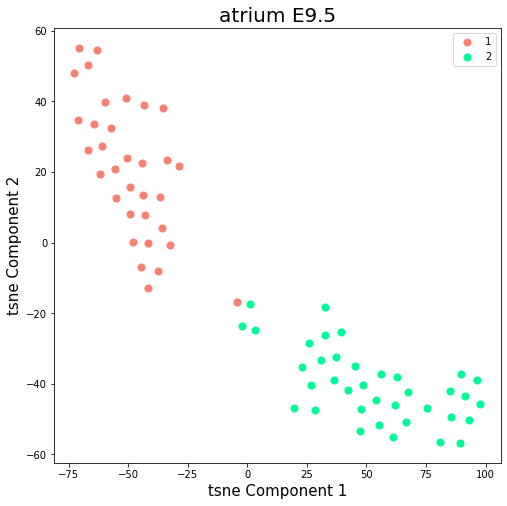

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15)
ax.set_ylabel('tsne Component 2', fontsize = 15)
ax.set_title('atrium E9.5', fontsize = 20)
targets = ['1', '2']
colors = ['salmon', 'mediumspringgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['classe'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne component 1']
               , finalDf.loc[indicesToKeep, 'tsne component 2']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.grid()
plt.show()
#plt.savefig("file.png", dpi = 300)

In [22]:
df_test

,Cdc45,Cav2,Ccl2,Gmpr,Hddc2,Comt,Icam2,Ckb,Myg1,ENSMUST00000001513.6,...,TCONS_00169441,TCONS_00174356,TCONS_00175530,TCONS_00176774,TCONS_00184519,TCONS_00206357,TCONS_00215219,TCONS_00218805,TCONS_00238361,classe
0,0.000000,0.000000,0.0000,47.27710,239.62100,0.000000,0.000000,194.07000,59.049900,0.00000,...,70.2126,0.0000,0.000000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0000,2
1,0.000000,0.000000,0.0000,29.57210,62.75410,0.000000,0.000000,134.57800,19.422500,11.22080,...,0.0000,94.4548,41.923000,0.0000,77.34230,0.00000,0.0000,40.19910,0.0000,2
2,0.000000,0.530325,0.0000,34.09590,225.17800,6.121240,0.000000,34.88310,0.000000,35.39420,...,0.0000,59.1907,0.000000,0.0000,131.97500,0.00000,0.0000,0.00000,0.0000,2
3,18.834100,0.000000,0.0000,89.42960,198.24900,0.000000,0.000000,199.86800,47.566700,176.67200,...,0.0000,0.0000,0.000000,0.0000,97.50140,0.00000,0.0000,13.23430,0.0000,2
4,0.000000,47.995200,0.0000,0.00000,278.98500,55.347700,557.821000,112.73700,8.166840,0.00000,...,0.0000,0.0000,0.000000,0.0000,0.00000,93.71740,311.5270,0.00000,0.0000,4
5,0.000000,0.000000,0.0000,0.00000,10.18350,0.000000,0.630397,61.92440,0.000000,2.20916,...,0.0000,0.0000,4.553640,0.0000,7.07276,0.00000,0.0000,0.00000,0.0000,1
6,0.000000,0.000000,0.0000,458.65300,0.00000,6.005890,0.000000,1.41505,0.000000,2.32202,...,0.0000,0.0000,0.000000,0.0000,0.00000,0.00000,0.0000,22.43800,0.0000,1
7,61.963800,0.000000,0.0000,2.39763,180.08300,0.000000,0.000000,593.70200,18.917300,239.55400,...,119.9990,0.0000,0.000000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0000,2
8,0.000000,23.293500,0.0000,1.10228,13.54880,2.962040,19.565400,0.00000,45.325500,0.00000,...,0.0000,0.0000,0.000000,0.0000,219.26600,94.60300,247.8220,0.00000,0.0000,1
9,0.000000,0.000000,0.0000,35.61770,175.23700,46.351500,0.000000,31.81530,12.689500,310.21200,...,0.0000,59.7989,0.000000,0.0000,65.01440,0.00000,0.0000,53.30950,0.0000,2


In [60]:
aqui = df_test.loc[df_test['classe'] == "2"]
aqui

,Gnai3,Cdc45,Igf2,Cav2,Klf6,Scmh1,Cox5a,Dlgap4,Tbx2,Cntn1,...,TCONS_00242309,TCONS_00242399,TCONS_00242400,TCONS_00244746,TCONS_00244747,TCONS_00247411,TCONS_00248422,TCONS_00249758,TCONS_00249759,classe
1,0.000000,0.000000,0.000000,0.000000,12.497300,0.00000,3.24381,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2
4,0.463730,0.000000,0.000000,0.559238,483.224000,0.00000,723.38700,0.00000,0.000000,0.000000,...,45.59990,3.708300,0.000000,0.000000,0.000000,0.0,2.93892,3.339140,0.041017,2
5,0.000000,0.000000,0.000000,0.000000,0.357120,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2
7,0.462285,0.000000,276.111000,0.000000,22.233300,0.00000,5.48523,0.00000,0.413808,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,18.91560,0.793042,0.046677,2
16,0.000000,0.000000,1.482670,0.000000,7.127310,0.00000,140.12200,0.00000,0.000000,0.000000,...,0.00000,13.066800,0.000000,17.917000,0.007207,0.0,3.03130,0.811791,0.047764,2
21,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2
22,0.466530,0.000000,0.714502,1.483020,12.793600,0.00000,499.81200,0.00000,0.000000,0.000008,...,1.40697,7.085970,0.000249,0.000000,0.000000,0.0,0.00000,1.662290,0.046094,2
28,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2
29,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2
30,0.000000,0.000000,0.818865,0.000000,8.212510,0.00000,0.00000,0.00000,0.000000,0.000009,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,2


In [59]:
#teste = aqui.loc[:, (aqui != 0).all()]
teste = aqui.loc[:, aqui.all() > 0.001]
teste

,classe
1,2
4,2
5,2
7,2
16,2
21,2
22,2
28,2
29,2
30,2


rownames(teste)

In [171]:
arquivo = open("testando.txt", 'w')
# iterating the columns 
for col in df.columns:
    print(col)

Gnai3                
Igf2                 
Cav2                 
Klf6                 
Cox5a                
Tbx2                 
Wnt9a                
Fer                  
Actr2                
Gna12                
Sdhd                 
Ccnd2                
Ccl2                 
Ncs1                 
Gmpr                 
Ifi202b              
Trim25               
Dgke                 
Scpep1               
Mnt                  
Cdh4                 
Bcl6b                
Comt                 
Rtca                 
Dbt                  
Dazap2               
Mcts1                
Rem1                 
Trappc10             
Tbrg4                
Galnt1               
Mkrn2                
Plin2                
Pdgfra               
Pdgfb                
Sox9                 
Rdx                  
C1d                  
Gm2a                 
Clcn4                
Zfp354c              
Hk2                  
St7                  
Kat2b                
Rab5b                
Rpl13     

Edem2                
Chchd4               
Ankrd27              
Oxsr1                
Tmem98               
Srrt                 
Cluap1               
Krtcap2              
ENSMUST00000040907.6 
Anln                 
Hist1h1c             
Ppig                 
Rps27l               
Nudt19               
Ss18                 
Vps37b               
Rubcn                
Vwa8                 
Nek9                 
Ccdc9                
Ipo9                 
H2afz                
Lnpep                
Orai2                
ENSMUST00000041053.9 
Trpc4ap              
Myo1d                
Creb3l2              
Sem1                 
Chchd7               
Zfp704               
Elac1                
Rab8b                
Gng10                
Meox2                
Abhd4                
Psme4                
Acad12               
Churc1               
Zfp938               
Plekhm1              
Trim37               
Zbed4                
ENSMUST00000041314.15
Ammecr1              
ENSMUST000

Stat5a               
Stat5a               .1
Stat5b               .1
Megf9                
Furin                
Rab5c                .1
Trim32               .1
Idh2                 
Acly                 
Atp8b2               .1
Nt5c3b               .2
Adar                 .1
Mfge8                .1
Shc1                 .1
Rgs3                 
Alad                 .1
Adam15               
Fam174b              
Cdc26                .1
Slc50a1              .1
Fkbp15               .1
Mef2a                .2
Msl1                 .1
Msl1                 .2
Dap3                 
Gon4l                .2
Syt11                
Hsdl2                .1
Ube3a                
Med1                 .1
Arl5c                
Lpar1                
Cwc25                .1
Cisd3                
Cisd3                .1
Cisd3                .2
Mllt6                .1
Akap2                .1
Arhgap23             .1
Tbkbp1               .1
Klf4                 
Gtf2h1               .1
Slc44a1              .

Cd200                .1
Atxn10               
ENSMUST00000163265.7 
Suz12                .1
Gm17178              
Sh3glb1              
Mms19                .1
Snrpa                .1
Cic                  
Ubl7                 
Mtdh                 .1
St13                 .1
Ilk                  .2
Klhl7                .1
Scaf4                .1
Lrch3                .3
Eapp                 .5
Cse1l                .1
Dcn                  .1
Repin1               .1
Matn2                .1
Smpd4                .1
Rab1a                .2
Mcrs1                
Pfkm                 
ENSMUST00000163516.7 
Brox                 .1
Tars2                
Rbm26                
Ndufaf2              
Ston1                
Ccnh                 .1
Tgfb1i1              
Psmd13               .1
Nedd9                
Unc13b               .3
Dlc1                 .2
Eif4a1               
Sh3glb2              .2
Pkm                  .1
Sp1                  .1
Proscos              
Cct3                 .1
Wi

TCONS_00170221       
TCONS_00170573       
TCONS_00171049       
TCONS_00174060       
TCONS_00175959       
TCONS_00185136       
TCONS_00185593       
TCONS_00185854       
TCONS_00186808       
TCONS_00188817       
TCONS_00189295       
TCONS_00189515       
TCONS_00189742       
TCONS_00190453       
TCONS_00190548       
TCONS_00191114       
TCONS_00197382       
TCONS_00197431       
TCONS_00204617       
TCONS_00204806       
TCONS_00204807       
TCONS_00206451       
TCONS_00206453       
TCONS_00206956       
TCONS_00207094       
TCONS_00207098       
TCONS_00208616       
TCONS_00209078       
TCONS_00209553       
TCONS_00214056       
TCONS_00214059       
TCONS_00214064       
TCONS_00214596       
TCONS_00215098       
TCONS_00215307       
TCONS_00215984       
TCONS_00215985       
TCONS_00217048       
TCONS_00217744       
TCONS_00217962       
TCONS_00218119       
TCONS_00218238       
TCONS_00219902       
TCONS_00220033       
TCONS_00220863       
TCONS_0022

In [179]:
aqui.loc[:, aqui.all() > 0.001]

,Cox5a,Ckm,Sptbn1 .1,Ttn,Myl2,Cox6c,Lpl,Atp5g3,Canx,Ryr2,...,Malat1 .1,ENSMUST00000173523,Gm15564,Atp2a2 .1,Gm37376,Myh6 .2,Myh6 .3,TCONS_00118149,TCONS_00229176,classe
0,329.40400,142.8060,4.428090,27.71080,1688.460,1114.1800,221.30100,1201.9900,44.968300,23.222500,...,1969.880,1079.4700,104.5340,968.5050,1225.4700,0.020526,2754.480,105.35900,409.7630,1
2,615.07000,21.5079,55.690300,114.11300,2144.470,585.8930,136.11500,1833.2700,10.433000,62.289800,...,673.179,231.3980,69.4138,181.2650,101.1630,122.801000,1152.380,78.09120,230.9240,1
4,782.23300,97.9910,26.687800,69.12890,3425.710,913.5560,267.01400,251.3450,7.356470,16.616700,...,986.373,421.3190,63.7967,1150.4700,319.3070,39.252100,1117.100,101.41000,234.7690,1
5,266.86300,363.0730,3.444720,57.84400,3097.590,554.8730,79.19260,820.1340,63.029700,1.076110,...,3249.270,2794.3500,91.5141,231.1560,2287.6100,52.533200,1043.100,89.55740,266.6650,1
6,492.93900,1589.2100,4.290810,21.79310,5702.640,1419.0900,80.97880,285.7890,16.563900,2.548050,...,2100.380,1971.8500,229.1590,822.9330,1526.8700,207.466000,2754.900,36.27030,580.2520,1
7,112.26000,9.6424,6.865620,49.36850,5278.370,1979.6900,839.71700,715.7390,19.755900,6.723090,...,654.912,532.2880,298.1490,262.9910,881.3280,29.568600,2192.890,29.09900,865.5910,1
9,53.63150,1098.8600,4.621810,17.34730,1774.060,500.0310,187.33600,384.8620,260.078000,15.199000,...,187.946,55.2263,46.8705,337.2780,112.8150,48.606500,818.003,147.53700,229.6890,1
10,708.74800,602.3220,14.290300,19.17470,617.717,1806.4300,132.03600,1907.7800,45.932800,26.784400,...,2427.800,934.4350,56.6158,768.9060,733.2720,137.528000,2394.310,38.25770,530.2330,1
11,93.67580,144.1980,225.482000,39.72750,2196.220,579.2350,177.75800,633.0850,0.391649,12.418800,...,1161.360,847.1990,43.1154,1091.5800,745.9150,80.166500,1074.910,82.37950,282.0330,1
13,158.38200,111.1640,3.047890,28.30590,2574.290,661.5110,366.65600,262.9400,30.314200,4.791060,...,506.583,53.1592,52.0382,211.2320,80.7859,140.296000,1114.610,79.38680,287.7850,1


In [177]:
teste

,Cav2,Klf6,Cox5a,Fer,Actr2,Gna12,Sdhd,Ccnd2,Trim25,Bcl6b,...,TCONS_00208616,TCONS_00209078,TCONS_00214056,TCONS_00218119,TCONS_00220931,TCONS_00229176,TCONS_00240236,TCONS_00249758,TCONS_00249759,classe
1,6.38139,214.956,50.949,0.00001,174.736,0.562295,3.32827,171.789,15.8986,3.99662,...,1.02178,384.152,0.002953,3.84599,0.596455,2386.29,0.301137,59.4139,0.031003,2
